### **Тема:Да се соберат податоци за цената на акциите на компаниите Amazon, Apple, Exxon, Nike, Pfizer и Tesla за изминатите 4 години. Потоа, да се направат мрежи на поврзаноста на цената на овие податоци. За крај, со помош на мерки на централност (Centrality Measures) да се објаснат резултатите.**

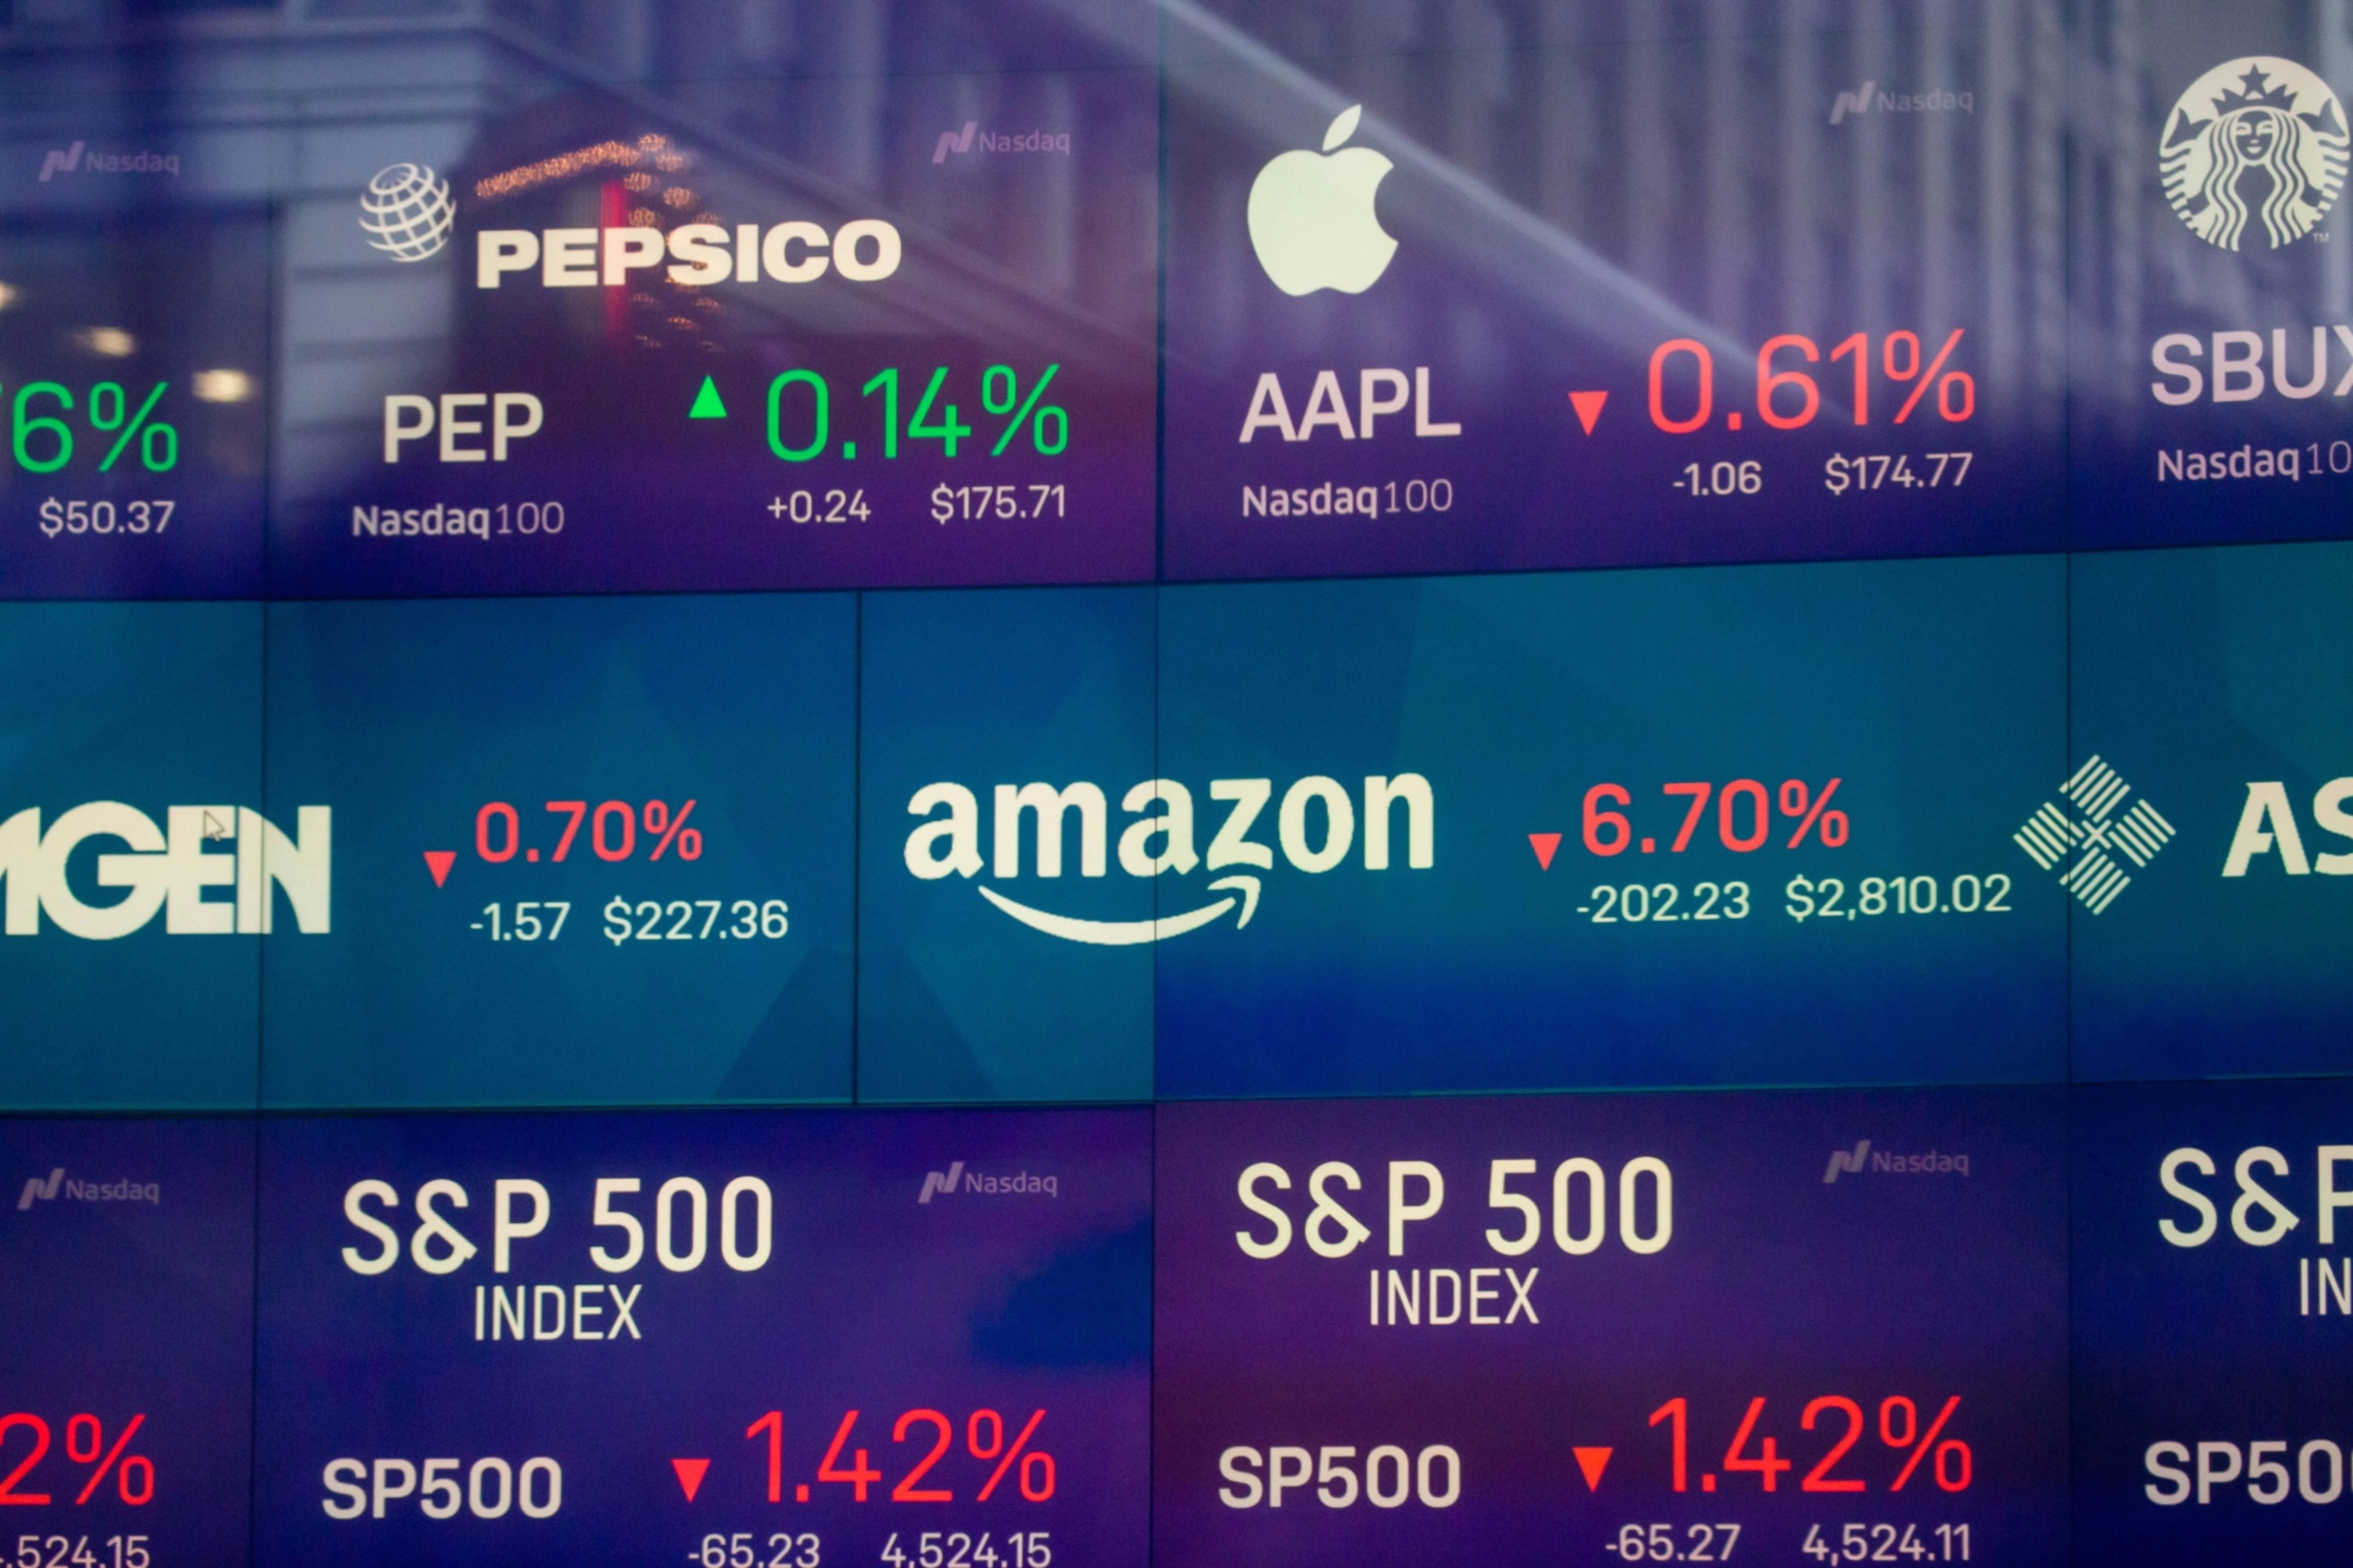
  

)

### **1.Подготовка на податоци**

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import plotly.express as px

In [ ]:
companies = ['AAPL', 'AMZN', 'XOM', 'NKE', 'PFE', 'TSLA']

In [ ]:
start_date = '2019-01-01'
end_date = '2023-08-08'


In [ ]:
company_data = {}

In [ ]:
for company in companies:
    data = yf.download(company, start=start_date, end=end_date)
    company_data[company] = data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
amazon_data = company_data['AMZN']
apple_data = company_data['AAPL']
exxon_data = company_data['XOM']
nike_data = company_data['NKE']
pfizer_data = company_data['PFE']
tesla_data = company_data['TSLA']

In [ ]:
amazon_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,73.260002,77.667999,73.046501,76.956497,76.956497,159662000
2019-01-03,76.000504,76.900002,74.855499,75.014000,75.014000,139512000
2019-01-04,76.500000,79.699997,75.915497,78.769501,78.769501,183652000
2019-01-07,80.115501,81.727997,79.459503,81.475502,81.475502,159864000
2019-01-08,83.234497,83.830498,80.830498,82.829002,82.829002,177628000


In [ ]:
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.943249,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.163822,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.622257,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.542969,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.220531,164101200


In [ ]:
exxon_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,67.349998,69.870003,67.260002,69.690002,54.455952,16727200
2019-01-03,70.000000,70.250000,68.360001,68.620003,53.619869,13866100
2019-01-04,69.639999,71.269997,69.360001,71.150002,55.596806,16043600
2019-01-07,71.250000,72.099998,70.739998,71.519997,55.885914,10844200
2019-01-08,72.540001,72.589996,71.940002,72.040001,56.292259,11439000


In [ ]:
nike_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,72.790001,74.639999,72.190002,74.059998,70.848526,6762700
2019-01-03,73.250000,73.320000,71.209999,72.750000,69.595329,8007400
2019-01-04,73.449997,75.120003,73.120003,74.650002,71.412964,7844200
2019-01-07,74.739998,76.360001,74.300003,75.720001,72.436554,8184800
2019-01-08,76.830002,77.400002,76.199997,76.730003,73.402733,8809000


In [ ]:
pfizer_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,40.910816,41.271347,40.455406,41.034157,34.349567,26430315
2019-01-03,41.024670,41.119545,39.800758,39.886147,33.388565,28503533
2019-01-04,40.265656,41.129032,40.094875,40.796963,34.151001,27145348
2019-01-07,40.863377,41.385201,40.664139,41.015179,34.333683,20995469
2019-01-08,41.328274,41.461102,40.939278,41.204933,34.492519,19677231


In [ ]:
tesla_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


In [ ]:
amazon_data.to_csv('amazon_data.csv')
apple_data.to_csv('apple_data.csv')
exxon_data.to_csv('exxon_data.csv')
nike_data.to_csv('nike_data.csv')
pfizer_data.to_csv('pfizer_data.csv')
tesla_data.to_csv('tesla_data.csv')

In [ ]:
combined_data = pd.concat([amazon_data['Adj Close'], apple_data['Adj Close'],
                           exxon_data['Adj Close'], nike_data['Adj Close'],
                           pfizer_data['Adj Close'], tesla_data['Adj Close']], axis=1)


In [ ]:
combined_data.columns = companies


In [ ]:
combined_data.to_csv('combined_stock_data.csv')

In [ ]:
combined_data

,AAPL,AMZN,XOM,NKE,PFE,TSLA
Date,,,,,,
2019-01-02,76.956497,37.943249,54.455952,70.848526,34.349567,20.674667
2019-01-03,75.014000,34.163822,53.619869,69.595329,33.388565,20.024000
2019-01-04,78.769501,35.622257,55.596806,71.412964,34.151001,21.179333
2019-01-07,81.475502,35.542969,55.885914,72.436554,34.333683,22.330667
2019-01-08,82.829002,36.220531,56.292259,73.402733,34.492519,22.356667
...,...,...,...,...,...,...
2023-08-01,131.690002,195.346207,105.753098,109.400002,35.610001,261.070007
2023-08-02,128.210007,192.320297,104.433907,107.510002,35.349998,254.110001
2023-08-03,128.910004,190.912201,106.249031,108.639999,35.000000,259.320007


In [ ]:
combined_data.isnull().sum()

AAPL    0
AMZN    0
XOM     0
NKE     0
PFE     0
TSLA    0
dtype: int64

### **2.Network analysis**

In [ ]:
price_correlation_matrix = combined_data.corr()
price_correlation_matrix

,AAPL,AMZN,XOM,NKE,PFE,TSLA
AAPL,1.000000,0.560246,-0.341189,0.800826,0.213033,0.696708
AMZN,0.560246,1.000000,0.528242,0.715239,0.697185,0.910871
XOM,-0.341189,0.528242,1.000000,0.018107,0.600951,0.326728
NKE,0.800826,0.715239,0.018107,1.000000,0.500706,0.794230
PFE,0.213033,0.697185,0.600951,0.500706,1.000000,0.715540
TSLA,0.696708,0.910871,0.326728,0.794230,0.715540,1.000000


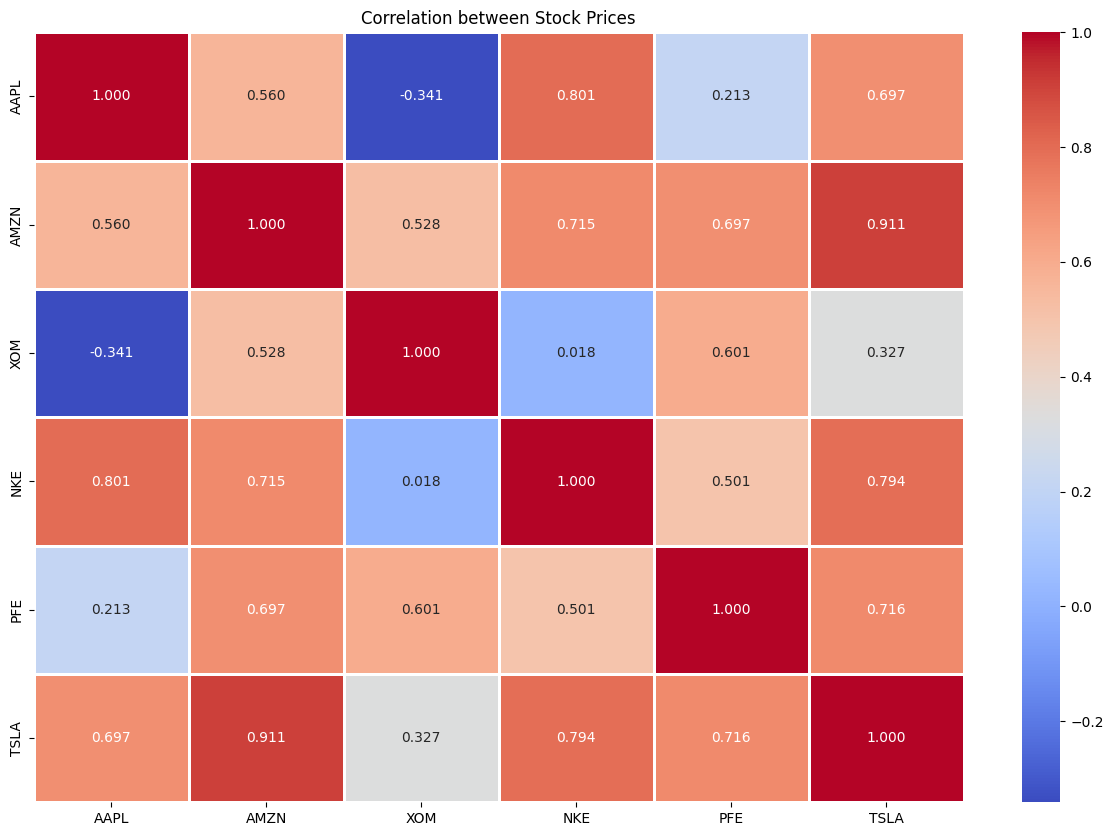

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap( combined_data.corr(), annot=True, cmap='coolwarm', fmt='.3f', linewidths=2)
plt.title('Correlation between Stock Prices')
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# price correlation network for the entire time period
G_correlation = nx.Graph()
node_colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff', '#e1caff']
for i, company in enumerate(companies):
    G_correlation.add_node(company, color=node_colors[i])

for i, company1 in enumerate(companies):
    for j, company2 in enumerate(companies):
        if i < j:
            correlation = price_correlation_matrix.loc[company1, company2]
            G_correlation.add_edge(company1, company2, weight=correlation)


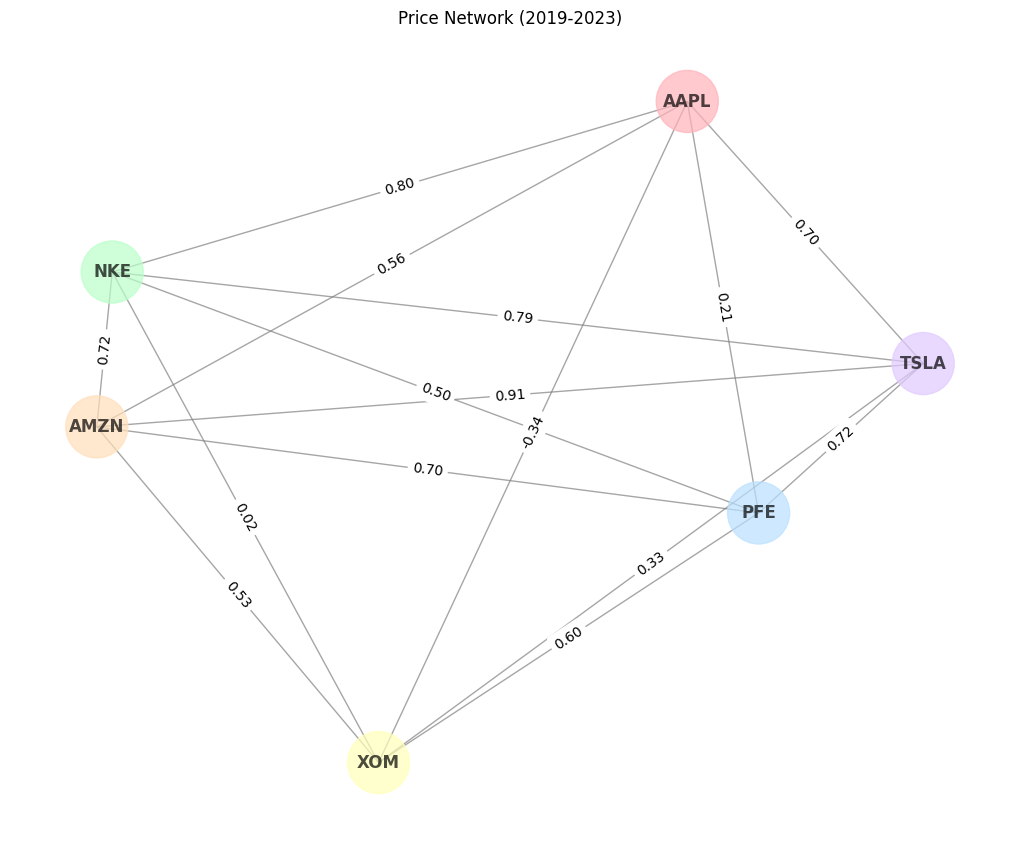

In [ ]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_correlation, k=1.2, seed=42)
labels = {company: company for company in companies}
edge_labels = {(company1, company2): f"{weight:.2f}" for company1, company2, weight in G_correlation.edges(data='weight')}
node_colors = [node[1]['color'] for node in G_correlation.nodes(data=True)]
nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, font_size=12, font_color='black', font_weight='bold', node_color=node_colors, edge_color='gray', alpha=0.7)
nx.draw_networkx_edge_labels(G_correlation, pos, edge_labels=edge_labels, font_size=10)
plt.title('Price Network (2019-2023)')
plt.show()



In [ ]:
# time periods for correlation networks
time_periods = [
    ('2019-01-01', '2020-01-01'),
    ('2020-01-01', '2021-01-01'),
    ('2021-01-01', '2022-01-01'),
    ('2022-01-01', '2023-08-08')
]


In [ ]:
pastel_colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff', '#ffb3ba']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


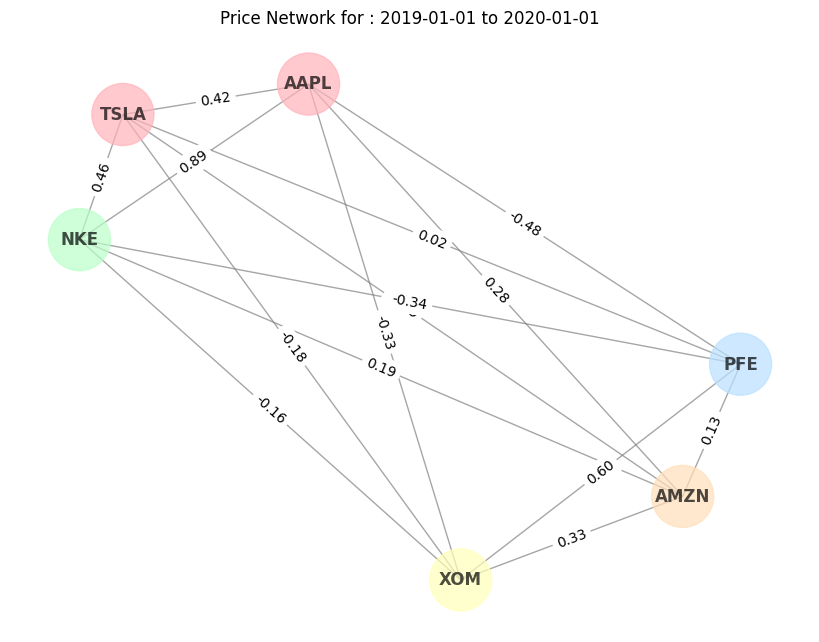

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


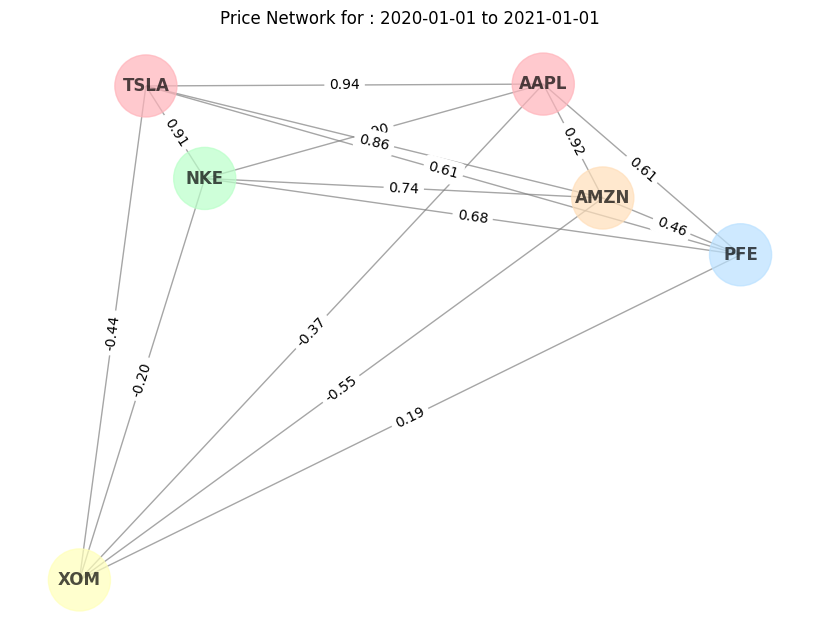

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


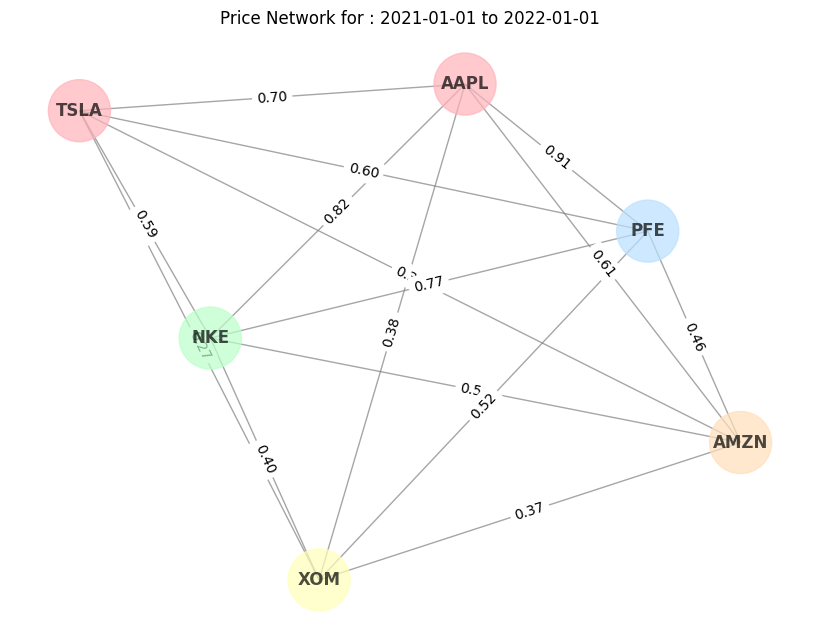

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


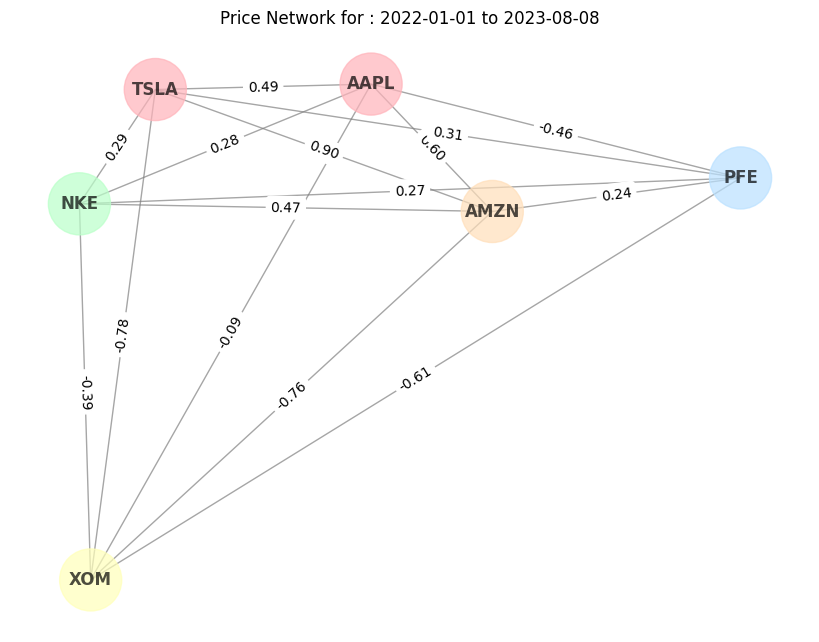

In [ ]:
# Loop through time periods and  correlation networks
for start_date, end_date in time_periods:
    company_data = {}
    for company in companies:
        data = yf.download(company, start=start_date, end=end_date)
        company_data[company] = data

    combined_data = pd.concat([company_data[company]['Adj Close'] for company in companies], axis=1)
    combined_data.columns = companies

    price_data = combined_data[start_date:end_date]
    price_correlation_matrix = price_data.corr()

    G = nx.Graph()
    for i, company in enumerate(companies):
        G.add_node(company, color=pastel_colors[i])

    for i, company1 in enumerate(companies):
        for j, company2 in enumerate(companies):
            if i < j:
                correlation = price_correlation_matrix.loc[company1, company2]
                G.add_edge(company1, company2, weight=correlation)

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, k=1.2, seed=42)
    labels = {company: company for company in companies}
    edge_labels = {(company1, company2): f"{weight:.2f}" for company1, company2, weight in G.edges(data='weight')}
    node_colors = [node[1]['color'] for node in G.nodes(data=True)]
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, font_size=12, font_color='black', font_weight='bold', node_color=node_colors, edge_color='gray', alpha=0.7)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    plt.title(f'Price Network for : {start_date} to {end_date}')
    plt.show()



In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print resul

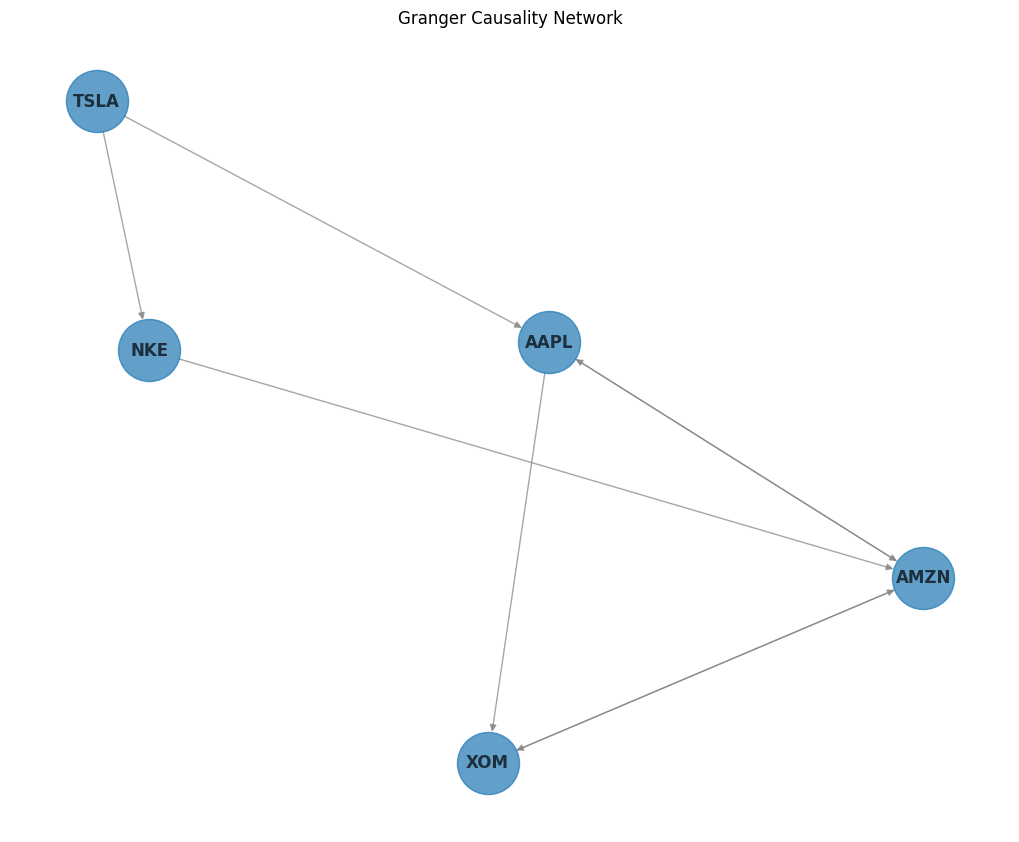

In [ ]:
#Granger Causality Network Build
def create_granger_causality_network(data, lag, significance_level):
    G_granger = nx.DiGraph()  # Create a directed graph

    for i, company1 in enumerate(companies):
        for j, company2 in enumerate(companies):
            if i != j:
                data_pair = data[[company1, company2]].dropna()
                result = grangercausalitytests(data_pair, lag, verbose=False)

                p_value = result[lag][0]['ssr_ftest'][1]
                if p_value < significance_level:
                    G_granger.add_edge(company1, company2, weight=-np.log(p_value))  # Negative log is set to emphasize causality strength

    return G_granger


lag = 5
significance_level = 0.05


granger_network = create_granger_causality_network(combined_data, lag, significance_level)


plt.figure(figsize=(10, 8))
pos = nx.spring_layout(granger_network, seed=42)
nx.draw(granger_network, pos, with_labels=True, node_size=2000, font_size=12, font_color='black', font_weight='bold', edge_color='gray', alpha=0.7)
plt.title('Granger Causality Network')
plt.show()

### **3.Centrality Measures and Results**

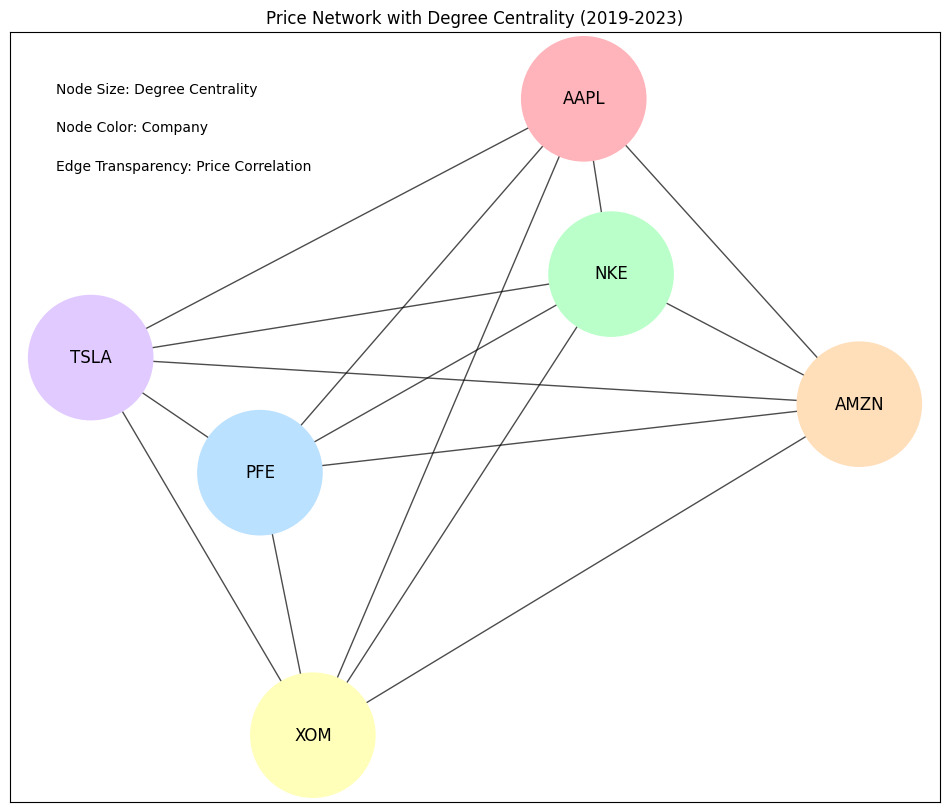

Degree Centrality:
AAPL: 1.000
AMZN: 1.000
XOM: 1.000
NKE: 1.000
PFE: 1.000
TSLA: 1.000

Closeness Centrality:
AAPL: 1.000
AMZN: 1.000
XOM: 1.000
NKE: 1.000
PFE: 1.000
TSLA: 1.000

Betweenness Centrality:
AAPL: 0.000
AMZN: 0.000
XOM: 0.000
NKE: 0.000
PFE: 0.000
TSLA: 0.000

Eigenvector Centrality:
AAPL: 0.408
AMZN: 0.408
XOM: 0.408
NKE: 0.408
PFE: 0.408
TSLA: 0.408


In [ ]:

# centrality measures for Correlation network
degree_centrality = nx.degree_centrality(G_correlation)
closeness_centrality = nx.closeness_centrality(G_correlation)
betweenness_centrality = nx.betweenness_centrality(G_correlation)
eigenvector_centrality = nx.eigenvector_centrality(G_correlation)

# Visualize the network with centrality measures
plt.figure(figsize=(12, 10))


node_sizes = [degree_centrality[node] * 8000 for node in G_correlation.nodes()]
nx.draw_networkx_nodes(G_correlation, pos=nx.spring_layout(G_correlation, seed=42), node_color=node_colors, node_size=node_sizes)


nx.draw_networkx_edges(G, pos=nx.spring_layout(G_correlation, seed=42), alpha=0.7)


nx.draw_networkx_labels(G, pos=nx.spring_layout(G_correlation, seed=42), font_size=12, font_color='black')

# centrality explanations
plt.text(0.05, 0.92, 'Node Size: Degree Centrality', transform=plt.gca().transAxes)
plt.text(0.05, 0.87, 'Node Color: Company', transform=plt.gca().transAxes)
plt.text(0.05, 0.82, 'Edge Transparency: Price Correlation', transform=plt.gca().transAxes)

plt.title('Price Network with Degree Centrality (2019-2023)')
plt.show()


print("Degree Centrality:")
for company, centrality in degree_centrality.items():
    print(f"{company}: {centrality:.3f}")

print("\nCloseness Centrality:")
for company, centrality in closeness_centrality.items():
    print(f"{company}: {centrality:.3f}")

print("\nBetweenness Centrality:")
for company, centrality in betweenness_centrality.items():
    print(f"{company}: {centrality:.3f}")

print("\nEigenvector Centrality:")
for company, centrality in eigenvector_centrality.items():
    print(f"{company}: {centrality:.3f}")

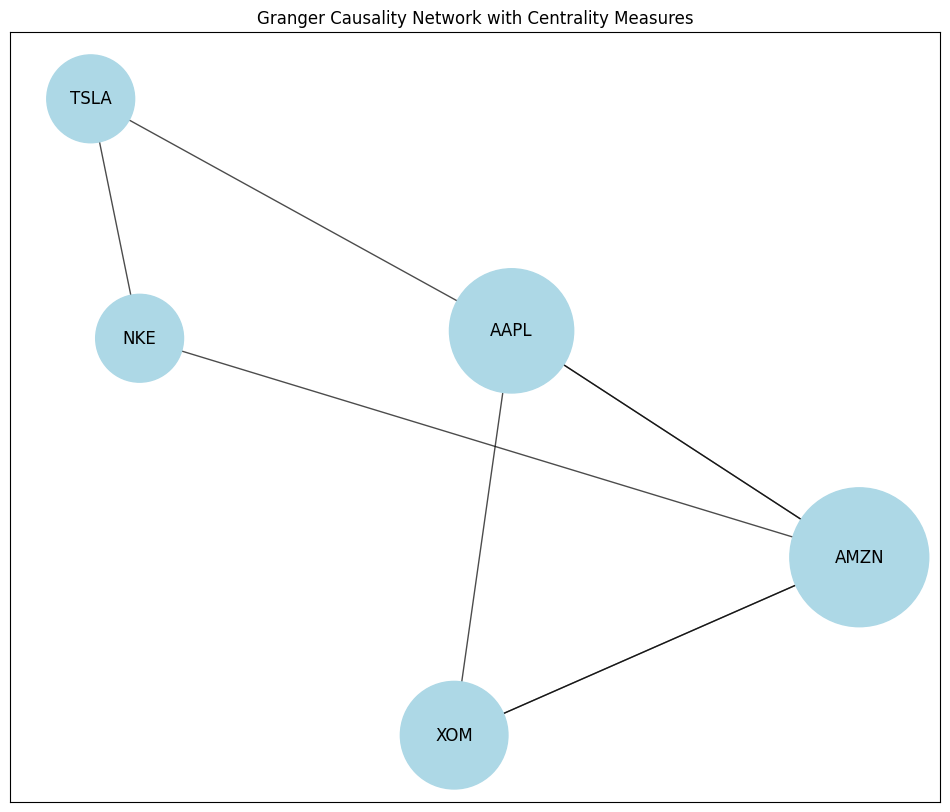

Degree Centrality:
AAPL: 1.000
AMZN: 1.250
XOM: 0.750
NKE: 0.500
TSLA: 0.500

Closeness Centrality:
AAPL: 0.667
AMZN: 0.800
XOM: 0.667
NKE: 0.250
TSLA: 0.000

Betweenness Centrality:
AAPL: 0.125
AMZN: 0.250
XOM: 0.000
NKE: 0.042
TSLA: 0.000

Eigenvector Centrality:
AAPL: 0.400
AMZN: 0.648
XOM: 0.648
NKE: 0.000
TSLA: 0.000


In [ ]:

# centrality measures on the Granger Causality network
degree_centrality = nx.degree_centrality(granger_network)
closeness_centrality = nx.closeness_centrality(granger_network)
betweenness_centrality = nx.betweenness_centrality(granger_network)
eigenvector_centrality = nx.eigenvector_centrality(granger_network)

pos = nx.spring_layout(granger_network, seed=42)

plt.figure(figsize=(12, 10))

node_sizes = [degree_centrality[node] * 8000 for node in granger_network.nodes()]
nx.draw_networkx_nodes(granger_network, pos, node_color='lightblue', node_size=node_sizes)


nx.draw_networkx_edges(granger_network, pos, alpha=0.7)

nx.draw_networkx_labels(granger_network, pos, font_size=12, font_color='black')

plt.title('Granger Causality Network with Centrality Measures')
plt.show()


print("Degree Centrality:")
for company, centrality in degree_centrality.items():
    print(f"{company}: {centrality:.3f}")

print("\nCloseness Centrality:")
for company, centrality in closeness_centrality.items():
    print(f"{company}: {centrality:.3f}")

print("\nBetweenness Centrality:")
for company, centrality in betweenness_centrality.items():
    print(f"{company}: {centrality:.3f}")

print("\nEigenvector Centrality:")
for company, centrality in eigenvector_centrality.items():
    print(f"{company}: {centrality:.3f}")